# Oasis InfoByte Summer Internship Program July 2023

# OIBSIP July 2023

# BY: T. J. Prakruthi

# TASK 5: Sales Prediction with Python

###  Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.

### Dataset Link:
### https://www.kaggle.com/datasets/bumba5341/advertisingcsv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
# Check for missing values in the dataset

df.isnull().values.any()
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

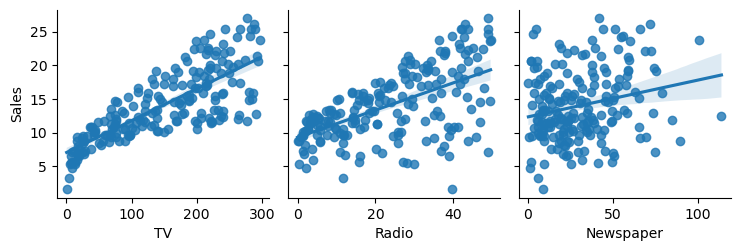

In [10]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

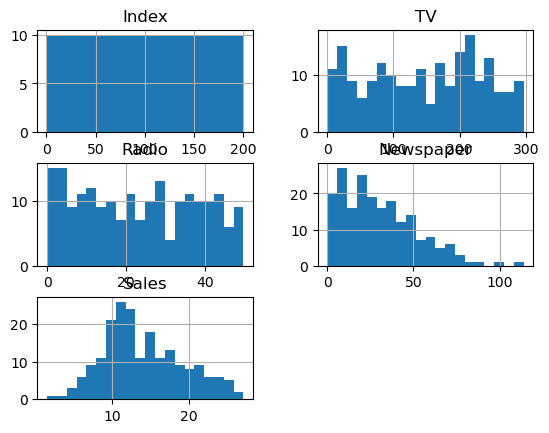

In [11]:
# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)

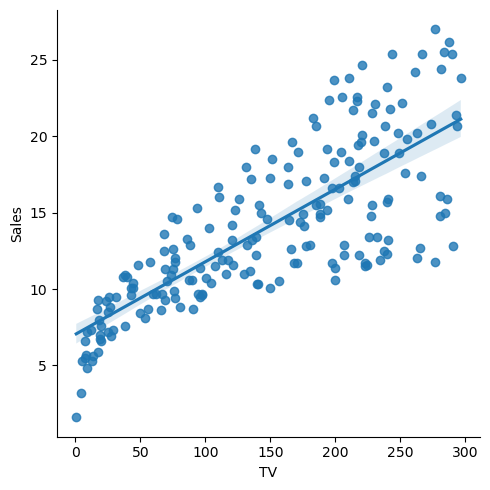

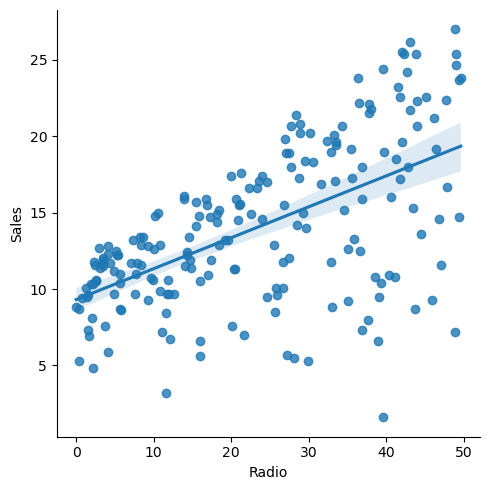

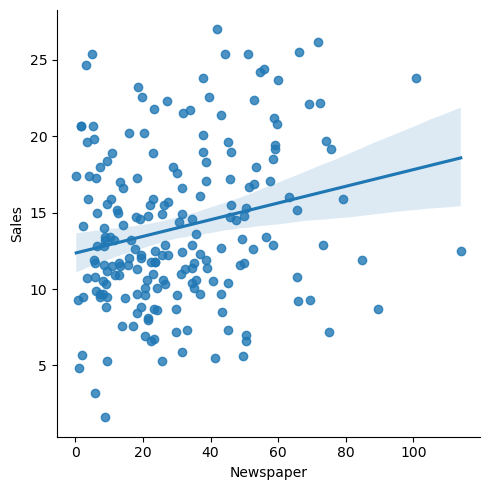

In [12]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable

sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

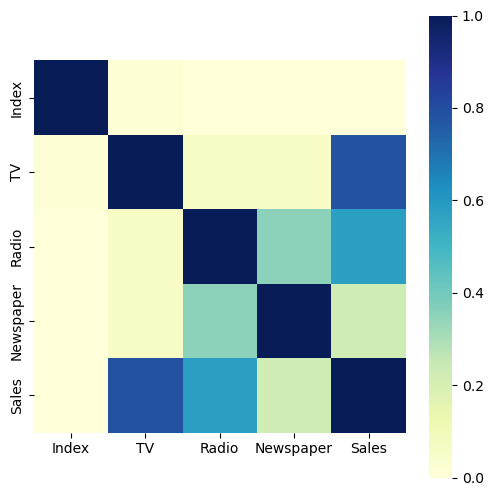

In [13]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

<Axes: >

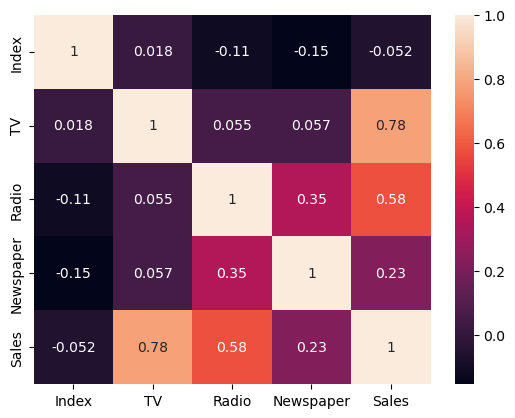

In [14]:
sns.heatmap(df.corr(),annot=True)

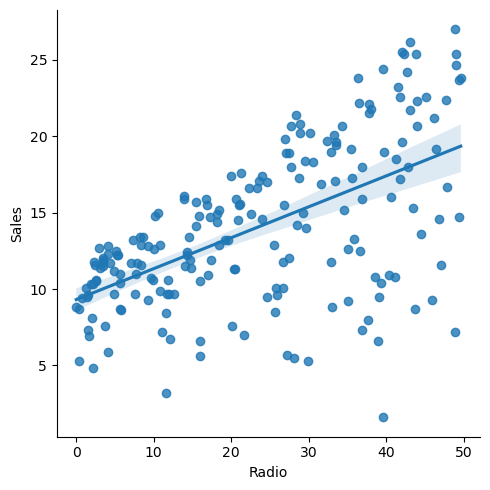

In [15]:
sns.lmplot(data=df,x='Radio',y="Sales")

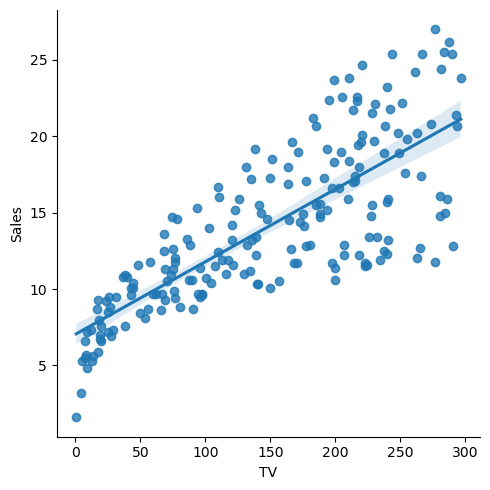

In [16]:
sns.lmplot(data=df,x='TV',y="Sales")

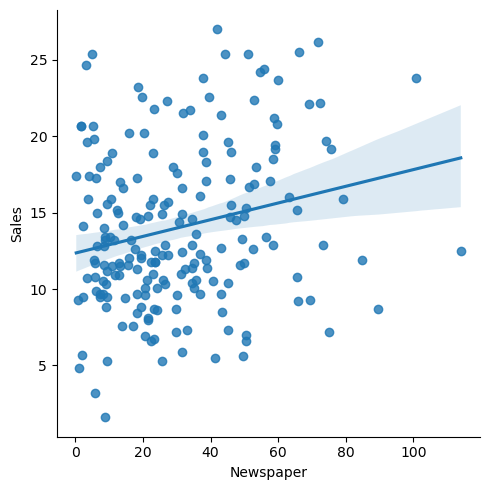

In [17]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
x=df.drop('Sales', axis=1)
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [20]:
model=LinearRegression()

model.fit(x_train,y_train)

y_predict=model.predict(x_test)



In [21]:
print(model.intercept_)
print(model.coef_)

3.0485261836334416
[-0.00161082  0.04431454  0.19644659  0.00290392]


In [22]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})
act_predict.head(20)

,Actual,Predict
0,11.3,10.164783
1,8.4,7.321016
2,8.7,7.006897
3,25.4,24.185348
4,11.7,11.938637
5,8.7,6.450216
6,7.2,13.248429
7,13.2,14.910981
8,9.2,11.168915
9,16.6,16.177065


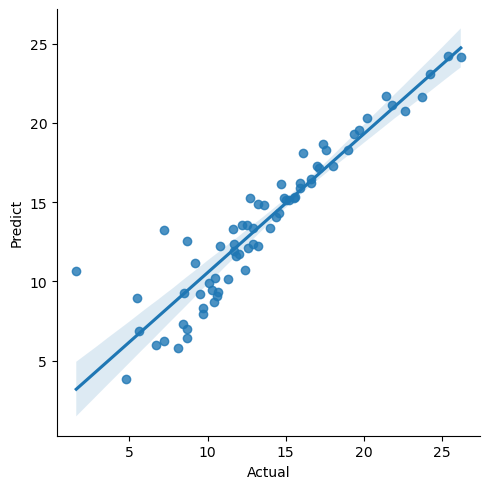

In [23]:
sns.lmplot(data=act_predict,x='Actual',y="Predict")

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.1903853037901788
Mean_squared_error: 3.3161132224423326
Squre_Mean_absolute_error: 1.0910478008731692
r2_score: 0.8703485256604557
